In [1]:
import pickle
import numpy as np
import tensorflow as tf
import PIL.Image

In [2]:
import matplotlib.pyplot as plt

In [3]:
tf.InteractiveSession()

In [4]:
with open('outputs/network-snapshot-004749.pkl', 'rb') as file:
    G, D, Gs = pickle.load(file)

In [13]:
latents = np.random.RandomState(1101).randn(1001, *[498]) 
latents = latents[[477, 56, 83, 887, 583, 391, 86, 340, 341, 415]]

c1 = np.zeros((10, 2))
c2 = np.zeros((10, 10))
c3 = np.zeros((10, 2))

#c1[:, 1] = 1
c1[:5, 0] = 1
c1[5:, 1] = 1

for i in range(10):
    c2[i, i] = 1
#c2[:, 1] = 1

c3[:5, 0] = 1
c3[5:, 1] = 1
#c3[:, 1] = 1

latents = np.hstack((latents, c1, c2, c3))

In [14]:
labels = np.zeros([latents.shape[0]] + Gs.input_shapes[1][1:])

In [15]:
images = Gs.run(latents, labels)

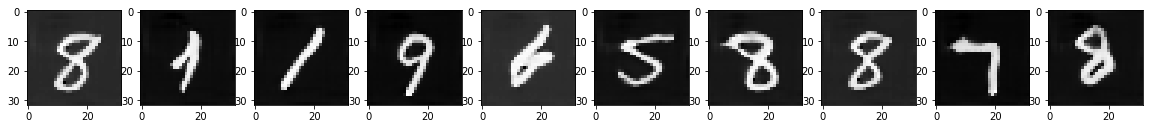

In [16]:
_, axs = plt.subplots(1, 10, figsize=(20, 2))
axs = axs.flatten()
for img, ax in zip(images, axs):
    ax.imshow(img.reshape(32, 32), cmap = 'gray')
    #plt.show()